In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# import Random Forest
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint


warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [10]:
import os

os.listdir('../datasets')

['complete_aus_data', 'Links.md']

In [11]:
DATA_DIR = '../datasets'

FILE_NAME = 'complete_aus_data.csv'

In [12]:
df = pd.read_csv(f'{DATA_DIR}/{FILE_NAME}')

In [13]:
df.head()

,SETTLEMENTDATE,TOTALDEMAND,RRP,WEEKDAYS,Holidays,Hour,Minute,Quarter,Time,Month,dp_x1,dp_x2,sdp_x1,sdp_x2,wp_x1,wp_x2,Time^2,Demand_lag1,Demand_lag2
0,2018-01-01 01:30:00,6466.06,73.62,0.0,1.0,1.0,30.0,1.0,1.5,1.0,0.195090,0.980785,0.382683,0.923880,0.028046,0.999607,2.25,6745.63,6912.25
1,2018-01-01 02:00:00,6279.80,71.49,0.0,1.0,2.0,0.0,1.0,2.0,1.0,0.258819,0.965926,0.500000,0.866025,0.037391,0.999301,4.00,6466.06,6745.63
2,2018-01-01 02:30:00,6177.31,69.27,0.0,1.0,2.0,30.0,1.0,2.5,1.0,0.321439,0.946930,0.608761,0.793353,0.046733,0.998907,6.25,6279.80,6466.06
3,2018-01-01 03:00:00,6050.43,68.44,0.0,1.0,3.0,0.0,1.0,3.0,1.0,0.382683,0.923880,0.707107,0.707107,0.056070,0.998427,9.00,6177.31,6279.80
4,2018-01-01 03:30:00,6032.48,69.67,0.0,1.0,3.0,30.0,1.0,3.5,1.0,0.442289,0.896873,0.793353,0.608761,0.065403,0.997859,12.25,6050.43,6177.31


<Axes: ylabel='Demand_lag2'>

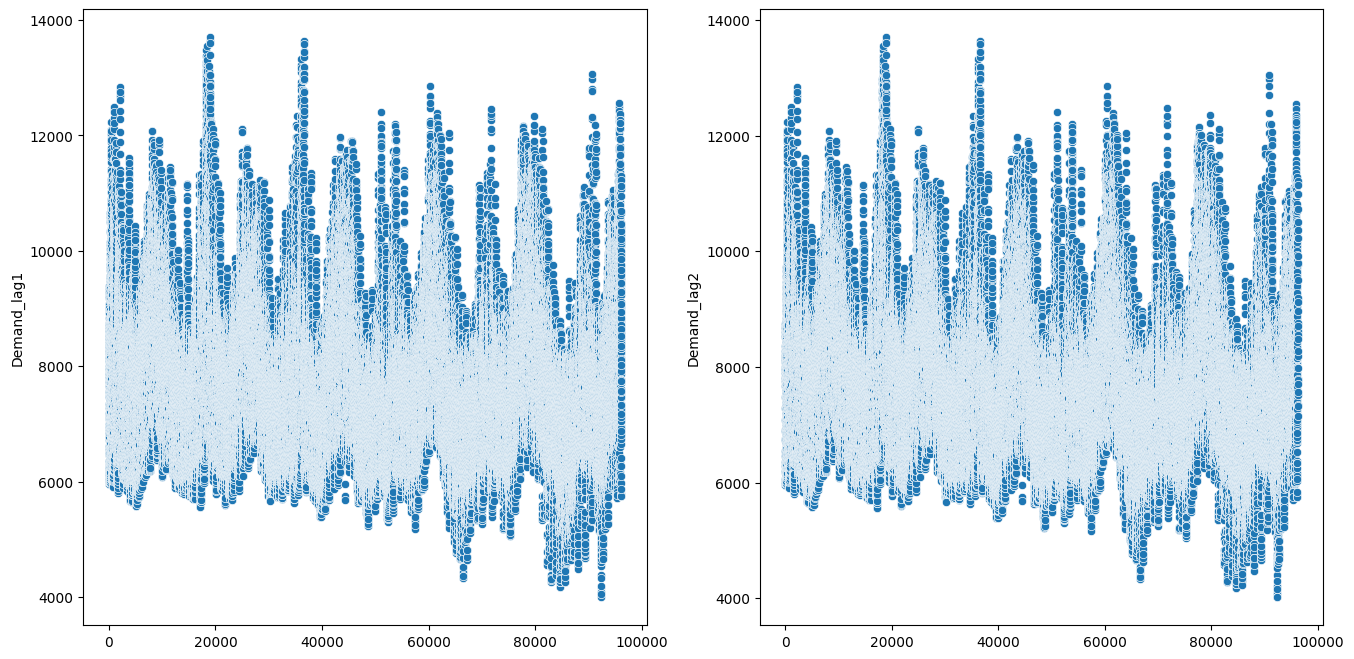

In [14]:
# Create a 2*2 figure to draw our diagrams
fig, axes = plt.subplots(1,2, figsize=(16, 8))

sns.scatterplot(df['Demand_lag1'], ax=axes[0])
sns.scatterplot(df['Demand_lag2'], ax=axes[1])

In [15]:
# Create a Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ))
])

In [16]:
# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)


In [17]:
# Split features and target
X = df.drop(['TOTALDEMAND', 'SETTLEMENTDATE'], axis=1)
y = df['TOTALDEMAND']

In [ ]:
# Fit the model
# pipeline.fit(X, y)

In [ ]:
# Let's do some cross-validation
# cv_scores = cross_val_score(pipeline, X, y, cv=tscv, scoring='neg_mean_absolute_error')

In [ ]:
# Report the CV results

# print(f"Time Series CV Results:")
# print(f"MAE: {-cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

Time Series CV Results:
MAE: 56.98 (+/- 33.00)


In [ ]:
# Calculate relative metrics for better interpretation
# demand_mean = df['TOTALDEMAND'].mean()
# demand_std = df['TOTALDEMAND'].std()

# print(f"Average demand: {demand_mean:.0f} MW")
# print(f"Demand std dev: {demand_std:.0f} MW")
# print(f"MAE as % of mean demand: {(56.98/demand_mean)*100:.2f}%")
# print(f"MAE as % of demand volatility: {(56.98/demand_std)*100:.2f}%")

Average demand: 7755 MW
Demand std dev: 1263 MW
MAE as % of mean demand: 0.73%
MAE as % of demand volatility: 4.51%


In [ ]:
# Let's benchmark this
# from sklearn.dummy import DummyRegressor

# # Naive baseline: always predict the mean
# dummy_mean = DummyRegressor(strategy='mean')
# dummy_scores = cross_val_score(dummy_mean, X, y, cv=tscv, scoring='neg_mean_absolute_error')

# # Lag baseline: predict yesterday's value at same time
# dummy_lag = DummyRegressor(strategy='constant', constant=df['Demand_lag1'].mean())
# lag_scores = cross_val_score(dummy_lag, X, y, cv=tscv, scoring='neg_mean_absolute_error')

# print(f"Your model MAE: {56.98:.2f}")
# print(f"Mean predictor MAE: {-dummy_scores.mean():.2f}")
# print(f"Lag predictor MAE: {-lag_scores.mean():.2f}")

Your model MAE: 56.98
Mean predictor MAE: 1032.76
Lag predictor MAE: 1003.81


In [ ]:
# Check fold-specific performance
# from sklearn.model_selection import cross_validate

# cv_results = cross_validate(pipeline, X, y, cv=tscv,
#                            scoring='neg_mean_absolute_error',
#                            return_train_score=True)

# print("Fold-by-fold performance:")
# for i, score in enumerate(cv_results['test_score']):
#     print(f"Fold {i+1}: {-score:.2f} MW")


Fold-by-fold performance:
Fold 1: 62.62 MW
Fold 2: 62.54 MW
Fold 3: 63.31 MW
Fold 4: 71.70 MW
Fold 5: 24.70 MW


In [ ]:
# 2. Analyze residuals by time period
# 3. Feature engineering for specific time periods
# 4. Try ensemble methods

In [ ]:
# cv_results

{'fit_time': array([ 38.02808523,  76.05330634,  86.39881253, 106.05487704,
        147.03885961]),
 'score_time': array([0.65851808, 0.78125167, 0.58941793, 0.5650332 , 0.52993274]),
 'test_score': array([-62.62424571, -62.54431562, -63.30525337, -71.69851583,
        -24.70481075]),
 'train_score': array([-28.43660281, -29.02968476, -30.70679545, -32.85095963,
        -31.0447189 ])}

In [18]:
# Now let's do some params tuning
# We will use RandomizedSearchCV for faster training

param_dist = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_depth': [10, 15, 20, 25, None],
    'rf__min_samples_split': randint(2, 20),
    'rf__min_samples_leaf': randint(1, 10),
    'rf__max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter=50,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

In [19]:
# Fit the Random Search

random_search.fit(X, y)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'rf__max_depth': [10, 15, ...], 'rf__max_features': ['sqrt', 'log2', ...], 'rf__min_samples_leaf': <scipy.stats....t 0x16c58bc50>, 'rf__min_samples_split': <scipy.stats....t 0x16c58b110>, ...}"
,n_iter,50
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,TimeSeriesSpl...est_size=None)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [20]:
print(f"Best CV score: {-random_search.best_score_:.2f} MW")
print(f"Best parameters: {random_search.best_params_}")

Best CV score: 56.95 MW
Best parameters: {'rf__max_depth': 20, 'rf__max_features': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 6, 'rf__n_estimators': 330}


In [21]:
# Train the final model with best searched params
final_pipeline = random_search.best_estimator_
final_pipeline.fit(X, y)

,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,330
,criterion,'squared_error'
,max_depth,20
,min_samples_split,6


In [22]:
# 3. EVALUATE FINAL MODEL
final_predictions = final_pipeline.predict(X)

In [23]:
mae = mean_absolute_error(y, final_predictions)
rmse = np.sqrt(mean_squared_error(y, final_predictions))
r2 = r2_score(y, final_predictions)

print(f"\nFinal Model Performance:")
print(f"MAE: {mae:.2f} MW")
print(f"RMSE: {rmse:.2f} MW")
print(f"R²: {r2:.4f}")
print(f"MAE as % of mean demand: {(mae/y.mean())*100:.2f}%")


Final Model Performance:
MAE: 21.49 MW
RMSE: 31.72 MW
R²: 0.9994
MAE as % of mean demand: 0.28%


In [25]:
feature_columns = df.columns.tolist()
feature_columns.remove('SETTLEMENTDATE')
feature_columns.remove('TOTALDEMAND')



feature_columns

['RRP',
 'WEEKDAYS',
 'Holidays',
 'Hour',
 'Minute',
 'Quarter',
 'Time',
 'Month',
 'dp_x1',
 'dp_x2',
 'sdp_x1',
 'sdp_x2',
 'wp_x1',
 'wp_x2',
 'Time^2',
 'Demand_lag1',
 'Demand_lag2']

In [26]:
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': final_pipeline.named_steps['rf'].feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
        feature  importance
15  Demand_lag1    0.982142
16  Demand_lag2    0.011358
10       sdp_x1    0.001199
0           RRP    0.000759
11       sdp_x2    0.000602
8         dp_x1    0.000597
13        wp_x2    0.000479
9         dp_x2    0.000479
14       Time^2    0.000411
12        wp_x1    0.000407


In [27]:
# Save the model
import joblib

joblib.dump(final_pipeline, '../models/electricity_demand_model.pkl')
print("\nModel saved as 'electricity_demand_model.pkl'")


Model saved as 'electricity_demand_model.pkl'


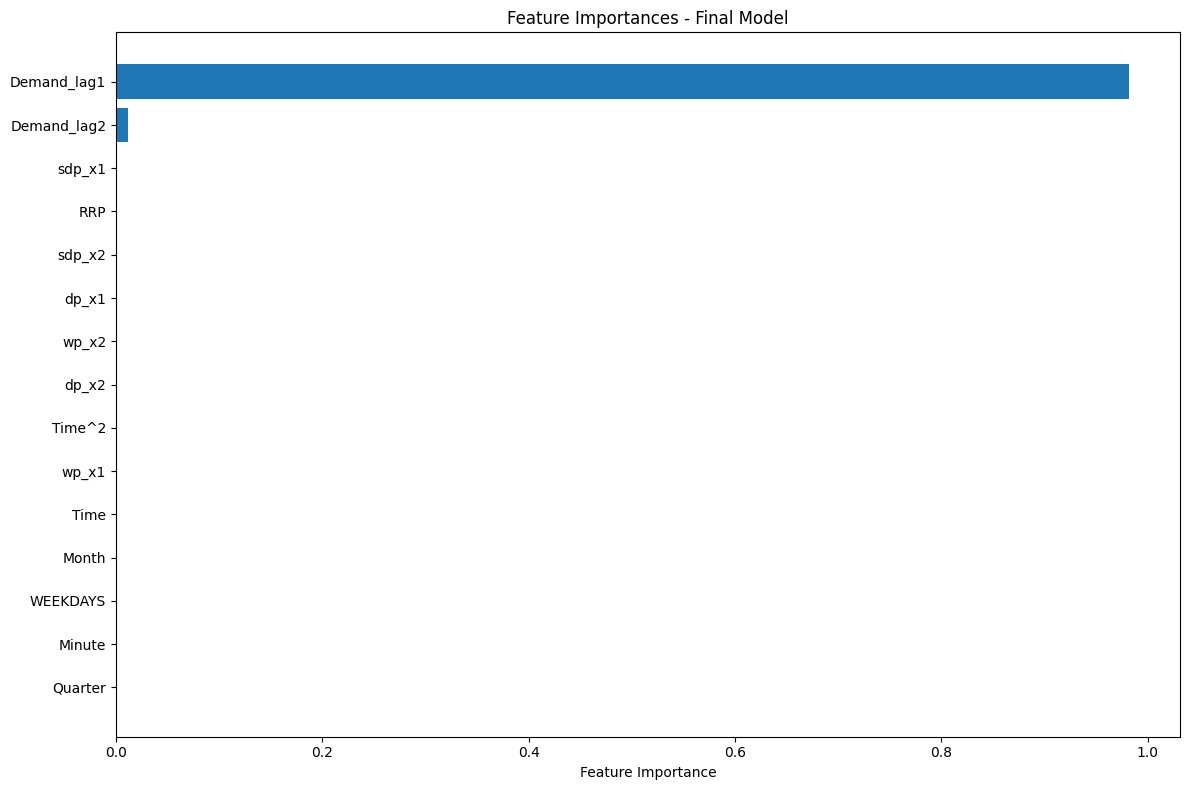

In [28]:
# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances - Final Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

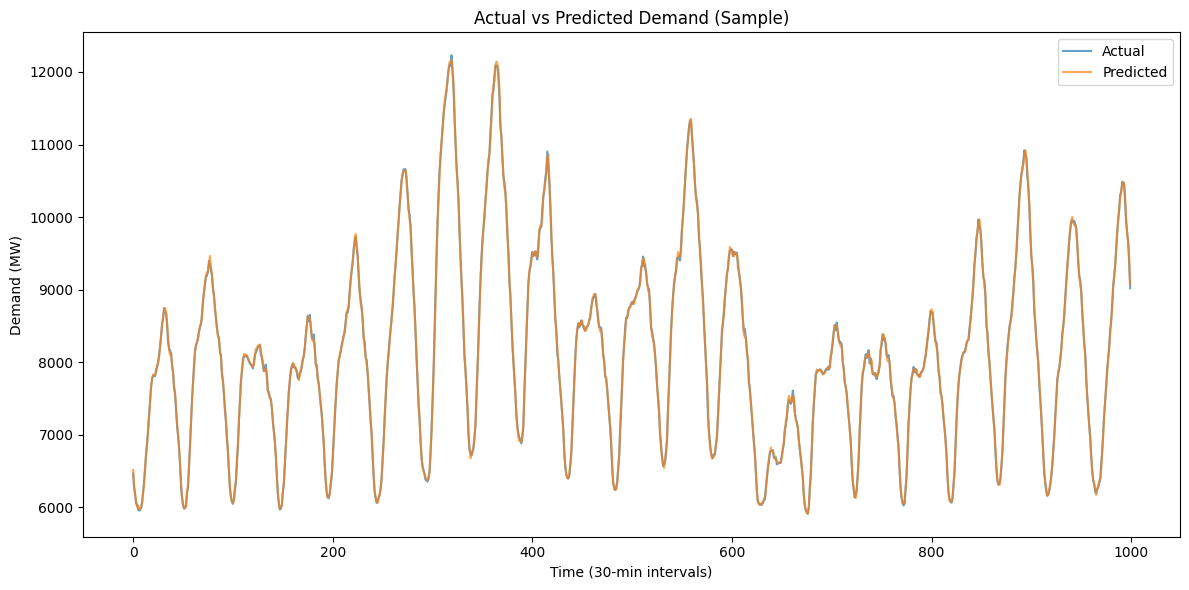

In [47]:
# Plot predictions vs actual (sample)
plt.figure(figsize=(12, 6))
sample_idx = slice(0, 1000)  # First 1000 points for readability
plt.plot(y.iloc[sample_idx].values, label='Actual', alpha=0.7)
plt.plot(final_predictions[sample_idx], label='Predicted', alpha=0.7)
plt.xlabel('Time (30-min intervals)')
plt.ylabel('Demand (MW)')
plt.title('Actual vs Predicted Demand (Sample)')
plt.legend()

plt.tight_layout()
plt.show()

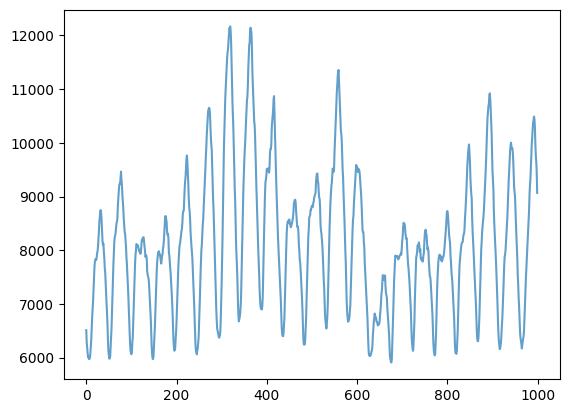

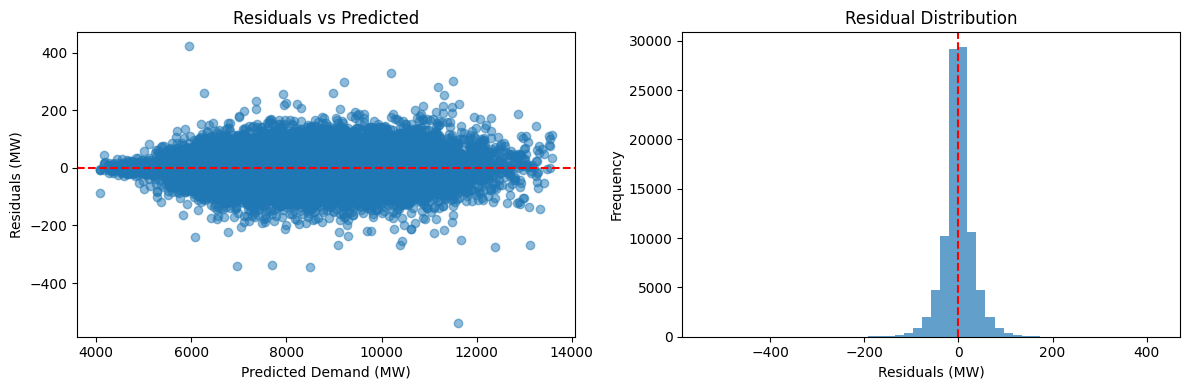

In [49]:
# Residual Analysis

# Residual analysis
residuals = y - final_predictions
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(final_predictions, residuals, alpha=0.5)
plt.xlabel('Predicted Demand (MW)')
plt.ylabel('Residuals (MW)')
plt.title('Residuals vs Predicted')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel('Residuals (MW)')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

In [50]:
print(f"\nResidual Statistics:")
print(f"Mean residual: {residuals.mean():.4f}")
print(f"Std residual: {residuals.std():.2f}")
print(f"95% of predictions within: ±{1.96 * residuals.std():.2f} MW")


Residual Statistics:
Mean residual: -0.1138
Std residual: 31.72
95% of predictions within: ±62.18 MW
